## Important
[1] Generative Adversarial Nets
https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf

[2] GAN Tutorial
https://arxiv.org/pdf/1701.00160.pdf


## Additional Reading
Unsupervised representation learning with deep convolutional generative
adversarial networks
https://arxiv.org/pdf/1511.06434.pdf

ENERGY-BASED GENERATIVE ADVERSARIAL NETWORKS
https://arxiv.org/pdf/1609.03126.pdf

In [1]:
#Pytorch example testing

In [25]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
# Explore sample dataset
dataset = dset.CIFAR10(root='../datasets/cifar-10-batches-py/', download=True,
                       transform=transforms.Compose([
                           transforms.Scale(64),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                       ])
)

In [9]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=20,
                                         shuffle=True, num_workers=int(2))

In [15]:
sample_image = samples[0][0].numpy()

In [26]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

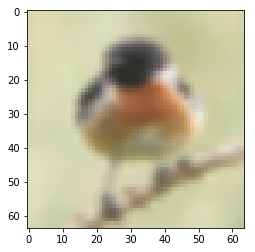

In [27]:
imshow(samples[0][0])

In [63]:
#Convolutional layer test
#Generator input z
nz = 100
batchSize = 64
fixed_noise = Variable(torch.FloatTensor(batchSize, nz, 1, 1).normal_(0, 1))
ones = Variable(torch.from_numpy(np.ones([batchSize,nz,1,1])))
convTransposed2d = nn.ConvTranspose2d(     nz, 64 * 8, 4, 1, 0, bias=False)

In [64]:
convTransposed2d

ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)

In [68]:
conv2d = nn.Conv2d(64*8,nz,4,1,0,bias = False)

In [76]:
conv2d.weight.data = convTransposed2d.weight.data

In [ ]:
output = convTransposed2d(ones)

In [87]:
conv2d(output)

Variable containing:
( 0 , 0 ,.,.) = 
 -8.3191e-01

( 0 , 1 ,.,.) = 
 -2.4450e-01

( 0 , 2 ,.,.) = 
 -1.0286e+00
    ... 

( 0 ,97 ,.,.) = 
 -3.3931e-01

( 0 ,98 ,.,.) = 
  4.5987e+00

( 0 ,99 ,.,.) = 
 -7.3245e-01
      ⋮  

( 1 , 0 ,.,.) = 
 -1.7998e-01

( 1 , 1 ,.,.) = 
 -1.8405e+00

( 1 , 2 ,.,.) = 
  2.0510e-01
    ... 

( 1 ,97 ,.,.) = 
 -6.8016e-01

( 1 ,98 ,.,.) = 
 -3.0250e+00

( 1 ,99 ,.,.) = 
  4.6484e-01
      ⋮  

( 2 , 0 ,.,.) = 
  7.7877e-01

( 2 , 1 ,.,.) = 
  2.0132e+00

( 2 , 2 ,.,.) = 
  2.1511e+00
    ... 

( 2 ,97 ,.,.) = 
  1.9253e+00

( 2 ,98 ,.,.) = 
 -3.6502e+00

( 2 ,99 ,.,.) = 
 -8.8116e-01
...     
      ⋮  

(61 , 0 ,.,.) = 
  3.4837e+00

(61 , 1 ,.,.) = 
 -4.0035e-01

(61 , 2 ,.,.) = 
 -8.5814e-01
    ... 

(61 ,97 ,.,.) = 
 -1.6919e-01

(61 ,98 ,.,.) = 
 -3.0346e+00

(61 ,99 ,.,.) = 
  5.6680e-01
      ⋮  

(62 , 0 ,.,.) = 
  4.2352e-02

(62 , 1 ,.,.) = 
 -1.4789e+00

(62 , 2 ,.,.) = 
  1.9792e+00
    ... 

(62 ,97 ,.,.) = 
 -1.8315e+00

(62 ,98 ,.,.) = 


In [88]:
fixed_noise

Variable containing:
( 0 , 0 ,.,.) = 
 -3.7547e-01

( 0 , 1 ,.,.) = 
 -1.6052e-01

( 0 , 2 ,.,.) = 
 -5.9118e-01
    ... 

( 0 ,97 ,.,.) = 
 -1.6025e-01

( 0 ,98 ,.,.) = 
  2.6687e+00

( 0 ,99 ,.,.) = 
 -5.7096e-01
      ⋮  

( 1 , 0 ,.,.) = 
  8.3789e-02

( 1 , 1 ,.,.) = 
 -1.1733e+00

( 1 , 2 ,.,.) = 
  5.7186e-02
    ... 

( 1 ,97 ,.,.) = 
 -2.8215e-01

( 1 ,98 ,.,.) = 
 -1.6814e+00

( 1 ,99 ,.,.) = 
  1.9751e-01
      ⋮  

( 2 , 0 ,.,.) = 
  4.4370e-01

( 2 , 1 ,.,.) = 
  1.2042e+00

( 2 , 2 ,.,.) = 
  1.1825e+00
    ... 

( 2 ,97 ,.,.) = 
  1.1176e+00

( 2 ,98 ,.,.) = 
 -2.1219e+00

( 2 ,99 ,.,.) = 
 -6.7144e-01
...     
      ⋮  

(61 , 0 ,.,.) = 
  1.9414e+00

(61 , 1 ,.,.) = 
 -2.6348e-01

(61 , 2 ,.,.) = 
 -4.5539e-01
    ... 

(61 ,97 ,.,.) = 
 -2.1561e-02

(61 ,98 ,.,.) = 
 -1.7914e+00

(61 ,99 ,.,.) = 
  4.9997e-01
      ⋮  

(62 , 0 ,.,.) = 
  5.8461e-02

(62 , 1 ,.,.) = 
 -6.9763e-01

(62 , 2 ,.,.) = 
  1.0900e+00
    ... 

(62 ,97 ,.,.) = 
 -1.0451e+00

(62 ,98 ,.,.) = 
